## 1. Import Necessary Libraries

In [1]:
import pandas as pd

from sklearn.datasets import load_breast_cancer
from sklearn. model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

## 2. Load Data 

In [2]:
breast_cancer_data=load_breast_cancer()

In [3]:
cancer_data=pd.DataFrame(breast_cancer_data.data, columns=breast_cancer_data.feature_names)
cancer_data['Target']=breast_cancer_data.target
cancer_data

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


## 3. Model Building

In [4]:
X=cancer_data.drop('Target', axis=1)
y=cancer_data[['Target']]

In [5]:
X.shape, y.shape

((569, 30), (569, 1))

In [6]:
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.20, random_state=12, stratify=y)

In [7]:
X_train.shape, y_train.shape

((455, 30), (455, 1))

In [8]:
X_test.shape, y_test.shape

((114, 30), (114, 1))

## 4. Model Training

In [9]:
dt_model=DecisionTreeClassifier()

In [10]:
%%time
dt_model.fit(X_train, y_train)

Wall time: 78.1 ms


DecisionTreeClassifier()

## 5. Model Testing || 6. Model Evaluation

### Training Data

In [11]:
y_pred_train=dt_model.predict(X_train)
print('Accuracy Score:', accuracy_score(y_train, y_pred_train))
print('Confusion Matrix:\n', confusion_matrix(y_train, y_pred_train))

Accuracy Score: 1.0
Confusion Matrix:
 [[170   0]
 [  0 285]]


### Test Data

In [12]:
y_pred_test=dt_model.predict(X_test)
print('Accuracy Score:', accuracy_score(y_test, y_pred_test))
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred_test))

Accuracy Score: 0.8771929824561403
Confusion Matrix:
 [[38  4]
 [10 62]]


## =============================================================================

## APPLYING PCA FOR REDUCING DIMENSIONS

In [13]:
from sklearn.preprocessing import StandardScaler
std_scalar=StandardScaler()
std_scalar=std_scalar.fit_transform(X)

X_scaled=pd.DataFrame(std_scalar, columns=X.columns)
X_scaled

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,2.110995,0.721473,2.060786,2.343856,1.041842,0.219060,1.947285,2.320965,-0.312589,-0.931027,...,1.901185,0.117700,1.752563,2.015301,0.378365,-0.273318,0.664512,1.629151,-1.360158,-0.709091
565,1.704854,2.085134,1.615931,1.723842,0.102458,-0.017833,0.693043,1.263669,-0.217664,-1.058611,...,1.536720,2.047399,1.421940,1.494959,-0.691230,-0.394820,0.236573,0.733827,-0.531855,-0.973978
566,0.702284,2.045574,0.672676,0.577953,-0.840484,-0.038680,0.046588,0.105777,-0.809117,-0.895587,...,0.561361,1.374854,0.579001,0.427906,-0.809587,0.350735,0.326767,0.414069,-1.104549,-0.318409
567,1.838341,2.336457,1.982524,1.735218,1.525767,3.272144,3.296944,2.658866,2.137194,1.043695,...,1.961239,2.237926,2.303601,1.653171,1.430427,3.904848,3.197605,2.289985,1.919083,2.219635


In [27]:
from sklearn.decomposition import PCA
pca_decomposition=PCA(n_components=2, random_state=12)
X_trainsformed=pca_decomposition.fit_transform(X_scaled) # PCA expects data in comman scale
X_trainsformed_df=pd.DataFrame(data=X_trainsformed)
X_trainsformed_df.columns=['X1','X2']
X_trainsformed_df

,X1,X2
0,9.192837,1.948583
1,2.387802,-3.768172
2,5.733896,-1.075174
3,7.122953,10.275589
4,3.935302,-1.948072
...,...,...
564,6.439315,-3.576817
565,3.793382,-3.584048
566,1.256179,-1.902297
567,10.374794,1.672010


In [28]:
pca_explaines_ratio=pca_decomposition.explained_variance_ratio_ # Tells how much information is collected by 10 decomposed features from 30 features
pca_explaines_ratio

array([0.44272026, 0.18971182])

In [29]:
import numpy as np
np.cumsum(np.round(a=pca_explaines_ratio, decimals=4)*100)

array([44.27, 63.24])

With 63% of information we are building the model and it is working good

## 3. Model Building

In [30]:
X_train, X_test, y_train, y_test=train_test_split(X_trainsformed_df,y, test_size=0.20, random_state=12, stratify=y)

In [31]:
X_train.shape, y_train.shape

((455, 2), (455, 1))

In [32]:
X_test.shape, y_test.shape

((114, 2), (114, 1))

## 4. Model Training

In [33]:
dt_model=DecisionTreeClassifier()

In [34]:
%%time
dt_model.fit(X_train, y_train)

Wall time: 9.98 ms


DecisionTreeClassifier()

## 5. Model Testing || 6. Model Evaluation

### Training Data

In [35]:
y_pred_train=dt_model.predict(X_train)
print('Accuracy Score:', accuracy_score(y_train, y_pred_train))
print('Confusion Matrix:\n', confusion_matrix(y_train, y_pred_train))

Accuracy Score: 1.0
Confusion Matrix:
 [[170   0]
 [  0 285]]


### Test Data

In [36]:
y_pred_test=dt_model.predict(X_test)
print('Accuracy Score:', accuracy_score(y_test, y_pred_test))
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred_test))

Accuracy Score: 0.868421052631579
Confusion Matrix:
 [[38  4]
 [11 61]]


Comparitively it reduces the computational time and also computational resource is also less after applying the PCA also got almost vsame accuracy and also the deviation also same

### Plotting

In [37]:
from matplotlib import pyplot as plt

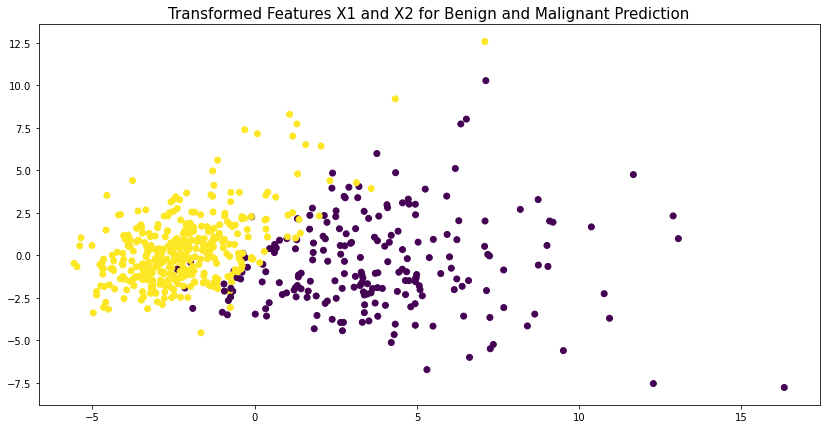

In [42]:
plt.figure(figsize=(14,7))
plt.scatter(x=X_trainsformed_df['X1'],y=X_trainsformed_df['X2'], c=cancer_data['Target'])
plt.title('Transformed Features X1 and X2 for Benign and Malignant Prediction', size=15)
plt.show()

#### How PCA works internally

In [24]:
from sklearn.decomposition import PCA
pca_decomposition=PCA(n_components=10, random_state=12)
X_trainsformed=pca_decomposition.fit_transform(X_scaled) # PCA expects data in comman scale
X_trainsformed_df=pd.DataFrame(data=X_trainsformed)
#X_trainsformed_df.columns=['X1','X2']
X_trainsformed_df

,0,1,2,3,4,5,6,7,8,9
0,9.192837,1.948583,-1.123166,3.633731,-1.195110,1.411424,2.159370,-0.398411,-0.157126,-0.877422
1,2.387802,-3.768172,-0.529293,1.118264,0.621775,0.028656,0.013358,0.240990,-0.711902,1.107007
2,5.733896,-1.075174,-0.551748,0.912083,-0.177086,0.541452,-0.668167,0.097375,0.024068,0.454270
3,7.122953,10.275589,-3.232790,0.152547,-2.960878,3.053422,1.429909,1.059568,-1.405433,-1.116980
4,3.935302,-1.948072,1.389767,2.940639,0.546747,-1.226495,-0.936212,0.636375,-0.263807,0.377703
...,...,...,...,...,...,...,...,...,...,...
564,6.439315,-3.576817,2.459487,1.177314,-0.074824,-2.375193,-0.596130,-0.035467,0.987936,0.257003
565,3.793382,-3.584048,2.088476,-2.506028,-0.510723,-0.246710,-0.716327,-1.113357,-0.105202,-0.108621
566,1.256179,-1.902297,0.562731,-2.089227,1.809991,-0.534447,-0.192758,0.341889,0.393920,0.520888
567,10.374794,1.672010,-1.877029,-2.356031,-0.033742,0.567936,0.223082,-0.280241,-0.542040,-0.089314


In [25]:
pca_explaines_ratio=pca_decomposition.explained_variance_ratio_ # Tells how much information is collected by 10 decomposed features from 30 features
pca_explaines_ratio

array([0.44272026, 0.18971182, 0.09393163, 0.06602135, 0.05495768,
       0.04024522, 0.02250734, 0.01588724, 0.01389649, 0.01168978])

In [26]:
import numpy as np
np.cumsum(np.round(a=pca_explaines_ratio, decimals=4)*100)

array([44.27, 63.24, 72.63, 79.23, 84.73, 88.75, 91.  , 92.59, 93.98,
       95.15])